In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data load

In [2]:
!ls ../data/

IFS_04-01-2024 17-18-26-29_timeSeries.csv
IFS_04-01-2024 17-18-26-29_timeSeries.zip
P_Data_Extract_From_Global_Financial_Development
P_Data_Extract_From_Global_Financial_Development.zip
P_Data_Extract_From_World_Development_Indicators_2013-1999
P_Data_Extract_From_World_Development_Indicators_2013-1999.zip
P_Data_Extract_From_World_Development_Indicators_2024-2014
P_Data_Extract_From_World_Development_Indicators_2024-2014.zip
US_data_fred.csv
WEO_Data.csv
WEO_Data.xls
WEO_Data.xlsx
foo.txt
labels.xlsx
master_data_1999_2021_comm_countries.csv
master_data_1999_2021_comm_countries_withlabels.csv


In [4]:
df_data = pd.read_csv('../data/master_data_1999_2021_comm_countries_withlabels.csv')
df_data.head()

/var/folders/hw/g2gfc_q905n4y1ptqjq551gc0000gn/T/ipykernel_64360/473611623.py:1: DtypeWarning: Columns (259,287,289,292,294) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv('../data/master_data_1999_2021_comm_countries_withlabels.csv')


,"Exchange Rates, Nominal Effective Exchange Rate, Index","Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index","Exchange Rates, SDR per US Dollar, End of Period","Exchange Rates, SDR per US Dollar, Period Average","Exchange Rates, SDRs per ounce of Gold, End of period, Rate","Exchange Rates, US Dollar per SDR, End of period, Rate","Exchange Rates, US Dollar per SDR, Period average, Rate","Exchange Rates, US Dollars per ounce of gold, End of period, Rate","External Trade, Goods, Value of Exports, Free on Board (FOB), US Dollars","External Trade, Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars",...,d_sy,d_sy_crit1,d_sy_crit2,d_sy_crit3,d_sy_crit4,d_dy,d_dy_crit1,d_dy_crit2,d_dy_crit3,d_dy_crit4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.510000e+08,1.140000e+09,...,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN
1,124.975154,125.228205,NaN,NaN,NaN,NaN,NaN,NaN,1.252500e+10,9.162000e+09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.157000e+09,3.109000e+09,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,106.649486,116.995165,NaN,NaN,NaN,NaN,NaN,NaN,3.800000e+07,4.140000e+08,...,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333300e+10,2.550800e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df_data = df_data.sort_values(by=['CountryCode', 'Year'])

# Calculate duration of each crisis
crisis_duration = df_data.groupby(['CountryCode', (df_data['d_dy'] != df_data['d_dy'].shift()).cumsum()])['d_dy'].transform('size')

# Filter only the crisis years
crisis_years = df_data[df_data['d_dy'] == 1]

# Assign the duration of each crisis
crisis_years['Crisis_Duration'] = crisis_duration[df_data['d_dy'] == 1].values

# Calculate average crisis duration for each country
avg_crisis_duration = crisis_years.groupby('CountryCode')['Crisis_Duration'].mean().reset_index()


/var/folders/hw/g2gfc_q905n4y1ptqjq551gc0000gn/T/ipykernel_64360/1174733960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_years['Crisis_Duration'] = crisis_duration[df_data['d_dy'] == 1].values


In [19]:
df_data = pd.merge(df_data, crisis_years[['CountryCode','Year','Crisis_Duration']], how = 'left', on = ['CountryCode','Year'])
df_data.head()

,"Exchange Rates, Nominal Effective Exchange Rate, Index","Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index","Exchange Rates, SDR per US Dollar, End of Period","Exchange Rates, SDR per US Dollar, Period Average","Exchange Rates, SDRs per ounce of Gold, End of period, Rate","Exchange Rates, US Dollar per SDR, End of period, Rate","Exchange Rates, US Dollar per SDR, Period average, Rate","Exchange Rates, US Dollars per ounce of gold, End of period, Rate","External Trade, Goods, Value of Exports, Free on Board (FOB), US Dollars","External Trade, Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars",...,d_sy_crit1,d_sy_crit2,d_sy_crit3,d_sy_crit4,d_dy,d_dy_crit1,d_dy_crit2,d_dy_crit3,d_dy_crit4,Crisis_Duration
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351000000.0,1.140000e+09,...,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261000000.0,1.091000e+09,...,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307000000.0,1.327000e+09,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340000000.0,1.504000e+09,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448000000.0,1.864000e+09,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [21]:
country_type = ['d_am','d_nsem','d_nslidc','d_sds']
df_data.groupby(country_type, as_index = False).agg({'CountryCode':'nunique','d_dy':['sum','mean'],'Crisis_Duration':'mean'})

d_am d_nsem d_nslidc d_sds CountryCode   d_dy           Crisis_Duration
                                 nunique    sum      mean            mean
0  0.0    0.0      0.0   1.0          22   84.0  0.224599        4.880952
1  0.0    0.0      1.0   0.0          36  240.0  0.392157        6.000000
2  0.0    1.0      0.0   0.0          58  210.0  0.212982        5.390476
3  1.0    0.0      0.0   0.0          30   20.0  0.039216        3.500000

## Feature Analysis

In [23]:
list(df_data.columns)

['Exchange Rates, Nominal Effective Exchange Rate, Index',
 'Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index',
 'Exchange Rates, SDR per US Dollar, End of Period',
 'Exchange Rates, SDR per US Dollar, Period Average',
 'Exchange Rates, SDRs per ounce of Gold, End of period, Rate',
 'Exchange Rates, US Dollar per SDR, End of period, Rate',
 'Exchange Rates, US Dollar per SDR, Period average, Rate',
 'Exchange Rates, US Dollars per ounce of gold, End of period, Rate',
 'External Trade, Goods, Value of Exports, Free on Board (FOB), US Dollars',
 'External Trade, Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars',
 'Financial Market Prices, Equities, Industrials, End of Period, Index',
 'Financial Market Prices, Equities, Primary Market Instruments, American Exchange, Index',
 'Financial Market Prices, Equities, Primary Market Instruments, NASDAQ, Index',
 "Financial Market Prices, Equities, Primary Market Instruments, Standard and Poor's

In [ ]:
feature_list = ['Exchange Rates, Nominal Effective Exchange Rate, Index',
 'Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index',
 'Exchange Rates, SDR per US Dollar, End of Period',
 'Exchange Rates, SDR per US Dollar, Period Average',
 'Exchange Rates, SDRs per ounce of Gold, End of period, Rate',
 'Exchange Rates, US Dollar per SDR, End of period, Rate',
 'Exchange Rates, US Dollar per SDR, Period average, Rate',
 'Exchange Rates, US Dollars per ounce of gold, End of period, Rate',
 'External Trade, Goods, Value of Exports, Free on Board (FOB), US Dollars',
 'External Trade, Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars',
 'Financial Market Prices, Equities, Industrials, End of Period, Index',
 'Financial Market Prices, Equities, Primary Market Instruments, American Exchange, Index',
 'Financial Market Prices, Equities, Primary Market Instruments, NASDAQ, Index',
 "Financial Market Prices, Equities, Primary Market Instruments, Standard and Poor's, Index",
 'Financial, Interest Rates, Central Bank Borrowing Facility Rate',
 'Fund Accounts, Currency Holdings as % of Quota, Percent per annum',
 'Fund Accounts, Currency Holdings, SDRs',
 'Fund Accounts, Currency Holdings, US Dollars',
 'Fund Accounts, Lending to the Fund, SDRs',
 'Fund Accounts, Lending to the Fund, US Dollars',
 'Fund Accounts, Net Cumulative Allocation, Escrow account, SDRs',
 'Fund Accounts, Net Cumulative Allocation, Escrow account, US Dollars',
 'Fund Accounts, Outstanding GRA, SDRs',
 'Fund Accounts, Outstanding GRA, US Dollars',
 'Fund Accounts, Outstanding Loans, SDRs',
 'Fund Accounts, Outstanding Loans, US Dollars',
 'Fund Accounts, Overdue Obligations, SDRs',
 'Fund Accounts, Overdue Obligations, US Dollars',
 'Fund Accounts, Quota, SDRs',
 'Fund Accounts, Quota, US Dollars',
 'Fund Accounts, SDR Holdings as % of Allocation, Percent per annum',
 'Fund Accounts, SDR Holdings, Allocations, SDRs',
 'Fund Accounts, SDR Holdings, Allocations, US Dollars',
 'Fund Accounts, UFC & Loans as % of Quota, Percent per annum',
 'Fund Accounts, UFC & Loans, SDRs',
 'Fund Accounts, UFC & Loans, US Dollars',
 'Fund Accounts, Use of Fund Credit and Loans, Reserve Tranche Position, SDRs',
 'Fund Accounts, Use of Fund Credit and Loans, Reserve Tranche Position, US Dollars',
 'International Liquidity, Monetary, Deposit Money Banks, Assets (Non-Standardized Presentation), US Dollars',
 'International Liquidity, Monetary, Deposit Money Banks, Liabilities (Non-Standardized Presentation), US Dollars',
 'International Liquidity, Monetary, Other Banking Institutions, Assets (Non-Standardized Presentation), US Dollars',
 'International Liquidity, Monetary, Other Banking Institutions, Liabilities (Non-Standardized Presentation), US Dollars',
 'International Liquidity, Monetary, Other Financial Intermediaries, Assets (Non-Standardized Presentation), US Dollars',
 'International Liquidity, Monetary, Other Financial Intermediaries, Liabilities (Non-Standardized Presentation), US Dollars',
 'International Reserves, Official Reserve Assets, Gold (Including Gold Deposits and, If Appropriate, Gold Swapped) , SDRs',
 'International Reserves, Official Reserve Assets, Gold (Including Gold Deposits and, If Appropriate, Gold Swapped) , US Dollars',
 'International Reserves, Official Reserve Assets, Gold (Including Gold Deposits and, If Appropriate, Gold Swapped), Volume in Millions of Fine Troy Ounces , Fine Troy Ounces',
 'International Reserves, Official Reserve Assets, Gold at Market Price, SDRs',
 'International Reserves, Official Reserve Assets, Gold at Market Price, US Dollars',
 'International Reserves, Official Reserve Assets, IMF Reserve Position, SDRs',
 'International Reserves, Official Reserve Assets, IMF Reserve Position, US Dollars',
 'International Reserves, Official Reserve Assets, SDRs, SDRs',
 'International Reserves, Official Reserve Assets, SDRs, US Dollars',
 'Monetary, Banking Institutions, Central Government Monetary Liabilities, Quasi-Monetary Deposits, Savings Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Central Government Monetary Liabilities, Quasi-Monetary Deposits, Time Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Claims on Central Government, Net (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Claims on Official Entities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Counterpart Funds (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Demand, Time, Savings, and Foreign Currency Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Foreign Liabilities, Long-term (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Institutions, Private Sector Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey and Financial Survey, Capital Accounts (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Central or General Government Deposits, Liabilities to Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey and Financial Survey, Claims on Nonbank Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey and Financial Survey, Domestic Claims (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Domestic Claims, Claims on Central or General Government, Net Claims on Central or General Government (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Domestic Claims, Claims on Private Sector (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Domestic Claims, Claims on Public Non-financial Corporations, Claims on Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey and Financial Survey, Domestic Claims, Claims on State and Local Government or Official Entities (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Foreign Assets, Net Foreign Assets (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Insurance Technical Reserves (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Liabilities to Nonbank Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey and Financial Survey, Other Items (Net) (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey and Financial Survey, Quasi-Money, Liquid Liabilities (Non-Standardized Presentation), US Dollars',
 'Monetary, Banking Survey, Claims on Official Entities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey, Foreign Liabilities, Long-term (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Banking Survey, Securities Other Than Shares, Bonds (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Broad Money, Currency in Circulation Outside Depository Corporations, Domestic Currency',
 'Monetary, Broad Money, Seasonally Adjusted, Domestic Currency',
 'Monetary, Deposit Money Banks, Central or General Government Deposits, Liabilities to Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Deposit Money Banks, Claims on Central or General Government, Claims on Provincial Governments (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Deposit Money Banks, Claims on Public Non-financial Corporations, Claims on Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Deposit Money Banks, Liabilities to Other Banking Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Deposit Money Banks, Memorandum Items, Treasury: Claims on Private Sector (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Deposit Money Banks, Variations of Time, Savings, and Foreign Currency Deposits: Time and Savings Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Central or General Government Deposits, Liabilities To Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Claims on Central Government, Net (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Claims on Central or General Government, Provincial Government (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Claims on Public Non-financial Corporations, Claims on Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Deposits of Nonfinancial Public Enterprises (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities, Reserve Money, Bankers Deposits, Foreign Currency Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Authorities/Central Bank, Total Assets (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Central or General Government Deposits, Liabilities to Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Claims on Official Entities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Domestic Claims, Claims on Public Non-financial Corporations, Claims on Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Foreign Liabilities, Long-term (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Liabilities to Other Banking Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Monetary Survey, Quasi-Money, Money plus Quasi-Money, Seasonally Adjusted (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Cash (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Claims on Central Government, Net (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Claims on Official Entities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Demand Deposits (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Foreign Assets, Net (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Foreign Assets, Variations: Trust Accounts External Assets (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Foreign Liabilities, Variations, Trust Accounts External Liabilities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Nonbank Financial Institutions, Time, Savings, and Foreign Currency Deposits, Variations, Trust Accounts Domestic Liabilities (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Other Banking Institutions and Nonbank Institutions, Claims on Other Financial Corporations (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Other Banking Institutions and Nonbank Institutions, Liabilities to Nonbank Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Other Banking Institutions and Nonbank Institutions, Variations of Central or General Government Deposits: Central Government, Liabilities to Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Monetary, Other Banking Institutions and Nonbank Institutions, Variations of Claims on Public Nonfinancial Corporations, Claims on Nonbank Public Financial Institutions (Non-Standardized Presentation), Domestic Currency',
 'Population, Persons, Number of',
 'Prices, Consumer Price Index, All items, Percentage change, Corresponding period previous year, Percent',
 'Prices, Consumer Price Index, All items, Percentage change, Previous period, Percent',
 'Year',
 'CountryCode',
 'Adjusted savings: carbon dioxide damage (% of GNI)',
 'Adjusted savings: carbon dioxide damage (current US$)',
 'Adjusted savings: consumption of fixed capital (% of GNI)',
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Adjusted savings: education expenditure (% of GNI)',
 'Adjusted savings: energy depletion (% of GNI)',
 'Adjusted savings: energy depletion (current US$)',
 'Adjusted savings: mineral depletion (% of GNI)',
 'Adjusted savings: mineral depletion (current US$)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Agriculture, forestry, and fishing, value added (annual % growth)',
 'Agriculture, forestry, and fishing, value added (constant 2015 US$)',
 'Agriculture, forestry, and fishing, value added (constant LCU)',
 'Agriculture, forestry, and fishing, value added (current LCU)',
 'Agriculture, forestry, and fishing, value added (current US$)',
 'Control of Corruption: Estimate',
 'Control of Corruption: Number of Sources',
 'Control of Corruption: Percentile Rank',
 'Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Control of Corruption: Standard Error',
 'DEC alternative conversion factor (LCU per US$)',
 'Export unit value index (2015 = 100)',
 'Export value index (2015 = 100)',
 'Export volume index (2015 = 100)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Foreign direct investment, net inflows (BoP, current US$)',
 'GDP (constant 2015 US$)',
 'GDP (constant LCU)',
 'GDP (current LCU)',
 'GDP (current US$)',
 'GDP deflator (base year varies by country)',
 'GDP deflator: linked series (base year varies by country)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita (constant LCU)',
 'GDP per capita (current LCU)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (constant 2017 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2017 international $)',
 'GDP, PPP (current international $)',
 'GDP: linked series (current LCU)',
 'GNI (current LCU)',
 'GNI (current US$)',
 'GNI per capita (current LCU)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'GNI, Atlas method (current US$)',
 'GNI, PPP (current international $)',
 'GNI: linked series (current LCU)',
 'Government Effectiveness: Estimate',
 'Government Effectiveness: Number of Sources',
 'Government Effectiveness: Percentile Rank',
 'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Government Effectiveness: Standard Error',
 'Gross value added at basic prices (GVA) (current LCU)',
 'Gross value added at basic prices (GVA) (current US$)',
 'Import unit value index (2015 = 100)',
 'Import value index (2015 = 100)',
 'Import volume index (2015 = 100)',
 'Industry (including construction), value added (% of GDP)',
 'Industry (including construction), value added (annual % growth)',
 'Industry (including construction), value added (constant 2015 US$)',
 'Industry (including construction), value added (constant LCU)',
 'Industry (including construction), value added (current LCU)',
 'Industry (including construction), value added (current US$)',
 'Inflation, GDP deflator (annual %)',
 'Inflation, GDP deflator: linked series (annual %)',
 'Manufacturing, value added (% of GDP)',
 'Manufacturing, value added (current LCU)',
 'Manufacturing, value added (current US$)',
 'Merchandise exports (current US$)',
 'Merchandise exports by the reporting economy (current US$)',
 'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
 'Merchandise exports to high-income economies (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports)',
 'Merchandise exports to low- and middle-income economies outside region (% of total merchandise exports)',
 'Merchandise imports (current US$)',
 'Merchandise imports by the reporting economy (current US$)',
 'Merchandise imports by the reporting economy, residual (% of total merchandise imports)',
 'Merchandise imports from high-income economies (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies in East Asia & Pacific (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies in Europe & Central Asia (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies in South Asia (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports)',
 'Merchandise imports from low- and middle-income economies outside region (% of total merchandise imports)',
 'Merchandise trade (% of GDP)',
 'Net barter terms of trade index (2015 = 100)',
 'Net primary income (Net income from abroad) (current LCU)',
 'Net primary income (Net income from abroad) (current US$)',
 'Net secondary income (Net current transfers from abroad) (current LCU)',
 'Net secondary income (Net current transfers from abroad) (current US$)',
 'PPP conversion factor, GDP (LCU per international $)',
 'Personal remittances, received (% of GDP)',
 'Personal remittances, received (current US$)',
 'Political Stability and Absence of Violence/Terrorism: Estimate',
 'Political Stability and Absence of Violence/Terrorism: Number of Sources',
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Political Stability and Absence of Violence/Terrorism: Standard Error',
 'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
 'Regulatory Quality: Estimate',
 'Regulatory Quality: Number of Sources',
 'Regulatory Quality: Percentile Rank',
 'Regulatory Quality: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Regulatory Quality: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Regulatory Quality: Standard Error',
 'Rule of Law: Estimate',
 'Rule of Law: Number of Sources',
 'Rule of Law: Percentile Rank',
 'Rule of Law: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Rule of Law: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Rule of Law: Standard Error',
 'Services, value added (% of GDP)',
 'Services, value added (constant LCU)',
 'Services, value added (current LCU)',
 'Services, value added (current US$)',
 'Voice and Accountability: Estimate',
 'Voice and Accountability: Number of Sources',
 'Voice and Accountability: Percentile Rank',
 'Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval',
 'Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval',
 'Voice and Accountability: Standard Error',
 'Bank credit to bank deposits (%)',
 'Bank deposits to GDP (%)',
 'Banking crisis dummy (1=banking crisis, 0=none)',
 'Central bank assets to GDP (%)',
 'Consolidated foreign claims of BIS reporting banks to GDP (%)',
 'Deposit money bank assets to deposit money bank assets and central bank assets (%)',
 "Deposit money banks'' assets to GDP (%)",
 'External loans and deposits of reporting banks vis-à-vis all sectors (% of domestic bank deposits)',
 'External loans and deposits of reporting banks vis-à-vis the banking sector (% of domestic bank deposits)',
 'External loans and deposits of reporting banks vis-à-vis the nonbanking sectors (% of domestic bank deposits)',
 'Financial system deposits to GDP (%)',
 'Liquid liabilities in millions USD (2000 constant)',
 'Liquid liabilities to GDP (%)',
 'Private credit by deposit money banks and other financial institutions to GDP (%)',
 'Private credit by deposit money banks to GDP (%)',
 'Remittance inflows to GDP (%)',
 'Current account balance (Percent of GDP)',
 'Current account balance (U.S. dollars)',
 'General government gross debt (National currency)',
 'General government gross debt (Percent of GDP)',
 'General government net lending/borrowing (National currency)',
 'General government net lending/borrowing (Percent of GDP)',
 'General government primary net lending/borrowing (National currency)',
 'General government primary net lending/borrowing (Percent of GDP)',
 'General government revenue (National currency)',
 'General government revenue (Percent of GDP)',
 'General government total expenditure (National currency)',
 'General government total expenditure (Percent of GDP)',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total (Percent)',
 'Gross domestic product corresponding to fiscal year, current prices (National currency)',
 'Gross domestic product per capita, constant prices (National currency)',
 'Gross domestic product per capita, constant prices (Purchasing power parity; 2017 international dollar)',
 'Gross domestic product per capita, current prices (National currency)',
 'Gross domestic product per capita, current prices (Purchasing power parity; international dollars)',
 'Gross domestic product per capita, current prices (U.S. dollars)',
 'Gross domestic product, constant prices (National currency)',
 'Gross domestic product, constant prices (Percent change)',
 'Gross domestic product, current prices (National currency)',
 'Gross domestic product, current prices (Purchasing power parity; international dollars)',
 'Gross domestic product, current prices (U.S. dollars)',
 'Gross domestic product, deflator (Index)',
 'Gross national savings (Percent of GDP)',
 'Implied PPP conversion rate (National currency per current international dollar)',
 'Inflation, average consumer prices (Index)',
 'Inflation, average consumer prices (Percent change)',
 'Inflation, end of period consumer prices (Index)',
 'Inflation, end of period consumer prices (Percent change)',
 'Population (Persons)',
 'Total investment (Percent of GDP)',
 'Volume of Imports of goods (Percent change)',
 'Volume of exports of goods (Percent change)',
 'Volume of exports of goods and services (Percent change)',
 'Volume of imports of goods and services (Percent change)']

In [62]:
feature = 'Gross domestic product per capita, current prices (Purchasing power parity; international dollars)'

df_data[feature]=df_data[feature].str.replace('-','0')
df_data[feature]=df_data[feature].str.replace(',','')
df_data[feature]=df_data[feature].astype(float)


In [103]:
df_data_feat_change = df_data.groupby(country_type+['d_cy'], as_index = False).agg({'Inflation, GDP deflator (annual %)':['mean','count'],
                                            'Inflation, average consumer prices (Index)':['mean','count'],
                                            'General government gross debt (Percent of GDP)':['mean','count'],
                                            'Total investment (Percent of GDP)':['mean','count'],
                                            'Volume of Imports of goods (Percent change)':['mean','count'],
                                             'Current account balance (U.S. dollars)':['mean','count'],
                                             'Gross domestic product per capita, current prices (Purchasing power parity; international dollars)':['mean','count']})

df_data_feat_change

d_am d_nsem d_nslidc d_sds d_cy Inflation, GDP deflator (annual %)        \
                                                                mean count   
0  0.0    0.0      0.0   1.0  0.0                           3.809597   235   
1  0.0    0.0      0.0   1.0  1.0                           7.478563   124   
2  0.0    0.0      1.0   0.0  0.0                           8.833178   299   
3  0.0    0.0      1.0   0.0  1.0                           8.643368   311   
4  0.0    1.0      0.0   0.0  0.0                           6.680889   719   
5  0.0    1.0      0.0   0.0  1.0                          15.016818   263   
6  1.0    0.0      0.0   0.0  0.0                           2.239008   484   
7  1.0    0.0      0.0   0.0  1.0                           2.257022    26   

  Inflation, average consumer prices (Index)        \
                                        mean count   
0                               8.801667e+01   236   
1                               7.734084e+01   138   
2                               7.143790e+02   300   
3                               1.033076e+03   312   
4                               2.779585e+11   706   
5                               4.315354e+11   259   
6                               9.333147e+01   484   
7                               1.016060e+02    26   

  General government gross debt (Percent of GDP)        \
                                            mean count   
0                                      54.960549   233   
1                                      76.760492   128   
2                                      51.072409   291   
3                                      64.567915   294   
4                                      37.007672   693   
5                                      58.900125   248   
6                                      59.703037   481   
7                                     103.305423    26   

  Total investment (Percent of GDP)        \
                               mean count   
0                         26.869586   133   
1                         21.484713    80   
2                         23.039474   251   
3                         19.981345   293   
4                         25.825336   676   
5                         22.527512   242   
6                         24.234114   484   
7                         19.819500    26   

  Volume of Imports of goods (Percent change)        \
                                         mean count   
0                                   10.180411   124   
1                                   14.653372    78   
2                                   26.699357   210   
3                                   13.589011   271   
4                                   14.235088   543   
5                                   13.217055   220   
6                                    8.359868   378   
7                                   13.123474    19   

  Current account balance (U.S. dollars)        \
                                    mean count   
0                               0.493000   201   
1                               0.156361    97   
2                               1.317284   299   
3                               0.624282   312   
4                              10.158219   716   
5                               3.779624   255   
6                              44.675764   484   
7                               6.552269    26   

  Gross domestic product per capita, current prices (Purchasing power parity; international dollars)  \
                                                                                                mean   
0                                       12004.395169                                                   
1                                       10409.545000                                                   
2                                        3716.560254                                                   
3                                        2934.935599                        

In [104]:
df_data_feat_change['Country Type'] = ['SDS','SDS','LIDC','LIDC','EM','EM','AM','AM']
df_data_feat_change

d_am d_nsem d_nslidc d_sds d_cy Inflation, GDP deflator (annual %)        \
                                                                mean count   
0  0.0    0.0      0.0   1.0  0.0                           3.809597   235   
1  0.0    0.0      0.0   1.0  1.0                           7.478563   124   
2  0.0    0.0      1.0   0.0  0.0                           8.833178   299   
3  0.0    0.0      1.0   0.0  1.0                           8.643368   311   
4  0.0    1.0      0.0   0.0  0.0                           6.680889   719   
5  0.0    1.0      0.0   0.0  1.0                          15.016818   263   
6  1.0    0.0      0.0   0.0  0.0                           2.239008   484   
7  1.0    0.0      0.0   0.0  1.0                           2.257022    26   

  Inflation, average consumer prices (Index)        \
                                        mean count   
0                               8.801667e+01   236   
1                               7.734084e+01   138   
2                               7.143790e+02   300   
3                               1.033076e+03   312   
4                               2.779585e+11   706   
5                               4.315354e+11   259   
6                               9.333147e+01   484   
7                               1.016060e+02    26   

  General government gross debt (Percent of GDP)        \
                                            mean count   
0                                      54.960549   233   
1                                      76.760492   128   
2                                      51.072409   291   
3                                      64.567915   294   
4                                      37.007672   693   
5                                      58.900125   248   
6                                      59.703037   481   
7                                     103.305423    26   

  Total investment (Percent of GDP)        \
                               mean count   
0                         26.869586   133   
1                         21.484713    80   
2                         23.039474   251   
3                         19.981345   293   
4                         25.825336   676   
5                         22.527512   242   
6                         24.234114   484   
7                         19.819500    26   

  Volume of Imports of goods (Percent change)        \
                                         mean count   
0                                   10.180411   124   
1                                   14.653372    78   
2                                   26.699357   210   
3                                   13.589011   271   
4                                   14.235088   543   
5                                   13.217055   220   
6                                    8.359868   378   
7                                   13.123474    19   

  Current account balance (U.S. dollars)        \
                                    mean count   
0                               0.493000   201   
1                               0.156361    97   
2                               1.317284   299   
3                               0.624282   312   
4                              10.158219   716   
5                               3.779624   255   
6                              44.675764   484   
7                               6.552269    26   

  Gross domestic product per capita, current prices (Purchasing power parity; international dollars)  \
                                                                                                mean   
0                                       12004.395169                                                   
1                                       10409.545000                                                   
2                                        3716.560254                                                   
3                                        2934.935599                        

<Axes: xlabel='Country Type', ylabel="('Inflation, GDP deflator (annual %)', 'mean')">

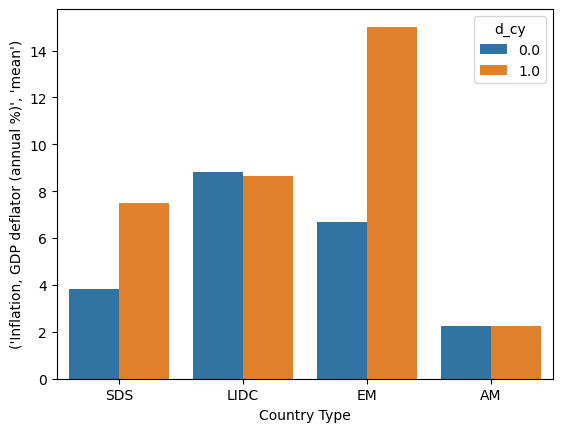

In [106]:
# This plot can be made for all the features we find interesting from the above table
sns.barplot(data = df_data_feat_change, y = ('Inflation, GDP deflator (annual %)','mean'),x = 'Country Type',hue='d_cy')

In [80]:
df_yr_crisis_growth = df_data[df_data['d_cy']==1].groupby(["Year"]+country_type, as_index=False).agg({"CountryCode":'nunique'})
df_yr_crisis_growth_all = df_data[df_data['d_cy']==1].groupby(["Year"], as_index=False).agg({"CountryCode":'nunique'})

In [74]:
df_yr_crisis_growth

,Year,d_am,d_nsem,d_nslidc,d_sds,CountryCode
0,1999,0.0,0.0,0.0,1.0,6
1,1999,0.0,0.0,1.0,0.0,26
2,1999,0.0,1.0,0.0,0.0,30
3,1999,1.0,0.0,0.0,0.0,1
4,2000,0.0,0.0,0.0,1.0,10
...,...,...,...,...,...,...
57,2014,1.0,0.0,0.0,0.0,2
58,2015,0.0,0.0,0.0,1.0,3
59,2015,0.0,0.0,1.0,0.0,9
60,2015,0.0,1.0,0.0,0.0,9


/Users/dc/anaconda3/envs/fin/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dc/anaconda3/envs/fin/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dc/anaconda3/envs/fin/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dc/anaconda3/envs/fin/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

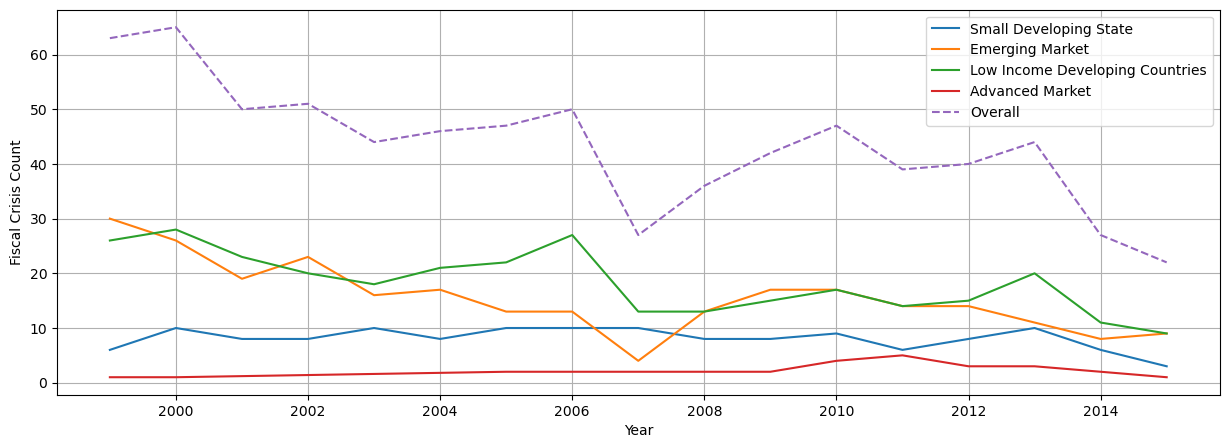

In [94]:
plt.figure(figsize = (15,5))

sns.lineplot(x = df_yr_crisis_growth[df_yr_crisis_growth['d_sds']==1].Year,y= df_yr_crisis_growth[df_yr_crisis_growth['d_sds']==1].CountryCode,label = 'Small Developing State')
sns.lineplot(x = df_yr_crisis_growth[df_yr_crisis_growth['d_nsem']==1].Year,y= df_yr_crisis_growth[df_yr_crisis_growth['d_nsem']==1].CountryCode,label = 'Emerging Market')
sns.lineplot(x = df_yr_crisis_growth[df_yr_crisis_growth['d_nslidc']==1].Year,y= df_yr_crisis_growth[df_yr_crisis_growth['d_nslidc']==1].CountryCode,label = 'Low Income Developing Countries')
sns.lineplot(x = df_yr_crisis_growth[df_yr_crisis_growth['d_am']==1].Year,y= df_yr_crisis_growth[df_yr_crisis_growth['d_am']==1].CountryCode,label = 'Advanced Market')
sns.lineplot(x = df_yr_crisis_growth_all.Year, y= df_yr_crisis_growth_all.CountryCode,linestyle='--',label = 'Overall')

plt.ylabel('Fiscal Crisis Count')
plt.grid(visible=True)


In [69]:
df_data[(df_data['d_cy']==1) & (df_data['Year']==2015)]['Country Name (IMF)'].unique()

array(['Albania', 'Argentina', 'Bangladesh', 'Belize',
       'Bosnia and Herzegovina', 'Chad', "Côte d'Ivoire", 'Ghana',
       'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Jamaica',
       'Jordan', 'Mozambique, Rep. of', 'Niger', 'Pakistan', 'Seychelles',
       'Sierra Leone', 'Tunisia', 'Ukraine',
       'Venezuela, Rep. Bolivariana de'], dtype=object)